<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [2]:
import numpy as np
from matplotlib import pyplot as plt

|Figure|Axis|
|:--|:--|
|Refers to the entire canvas that is being produced. You can have multiple graphs within a figure.|An individual mathematical axis being used for plotting. This axis is like our mathematical x and y axes.|

### 1.2 We need some data.

In [6]:
x = np.linspace(-np.pi, np.pi, 100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### 1.3 Here comes the comparison

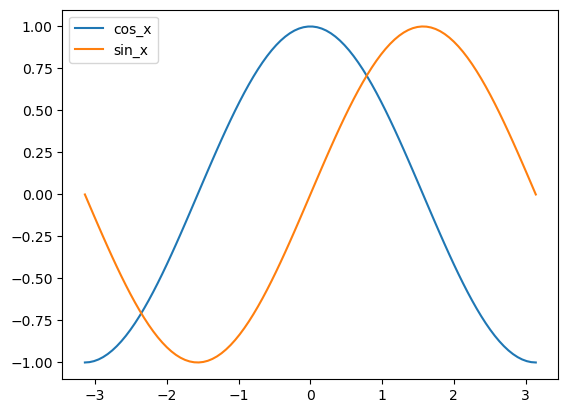

In [7]:
plt.plot(x, cos_x, label = "cos_x")
plt.plot(x, sin_x, label = "sin_x")
plt.legend()
plt.show()

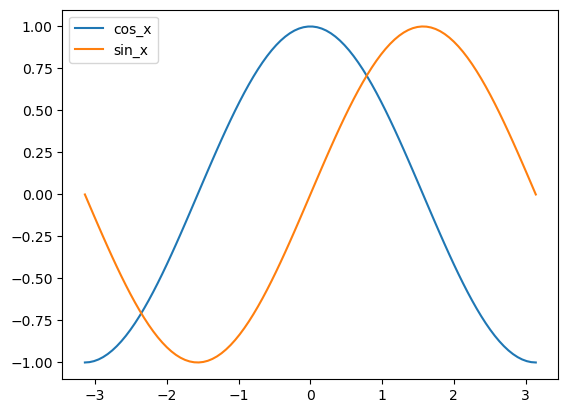

In [20]:
figure, axis = plt.subplots(nrows = 1, ncols = 1)
axis.plot(x, cos_x, label = "cos_x")
axis.plot(x, sin_x, label = "sin_x")
axis.legend()
plt.show()

## 2 Using the OO Interface

So the plt interface works for very simple and quick graphs, but if we want to start to make more complex or complicated data visualisation methods, there are more tools available to us. We can use the Object Oriented Interface, or OO Interface, to control the behaviour and customize to a much greater extent the behaviour of our figures.

### 2.1 Getting ax

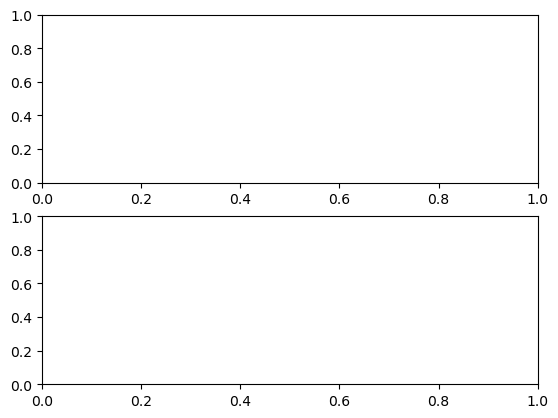

In [15]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)

### 2.2 What is ax

In [21]:
print(type(ax))

<class 'numpy.ndarray'>


In [23]:
print(ax.shape)

(2,)


In [24]:
print(type(ax[0]))

<class 'matplotlib.axes._subplots.AxesSubplot'>


### 2.3 Plots in a column

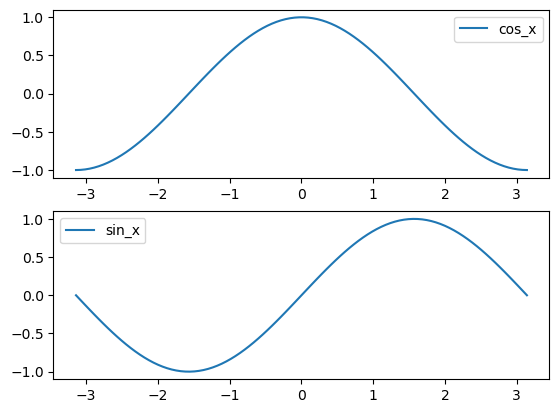

In [29]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)
ax[0].plot(x, cos_x, label = "cos_x")
ax[1].plot(x, sin_x, label = "sin_x")
ax[0].legend()
ax[1].legend()
plt.show()

### 2.4 Legends

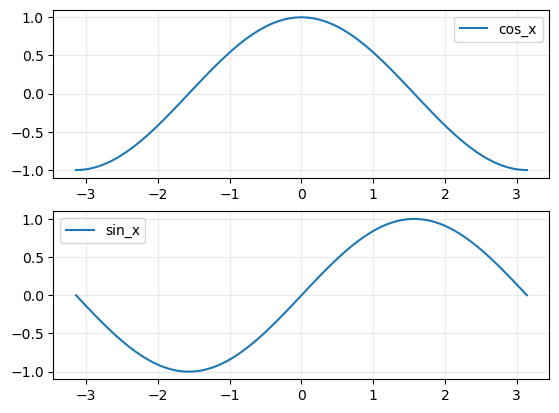

In [35]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)
ax[0].plot(x, cos_x, label = "cos_x")
ax[1].plot(x, sin_x, label = "sin_x")
for a in ax:
    a.legend()
    a.grid(alpha = .25)
    
plt.show()

### 2.5 Tweaks

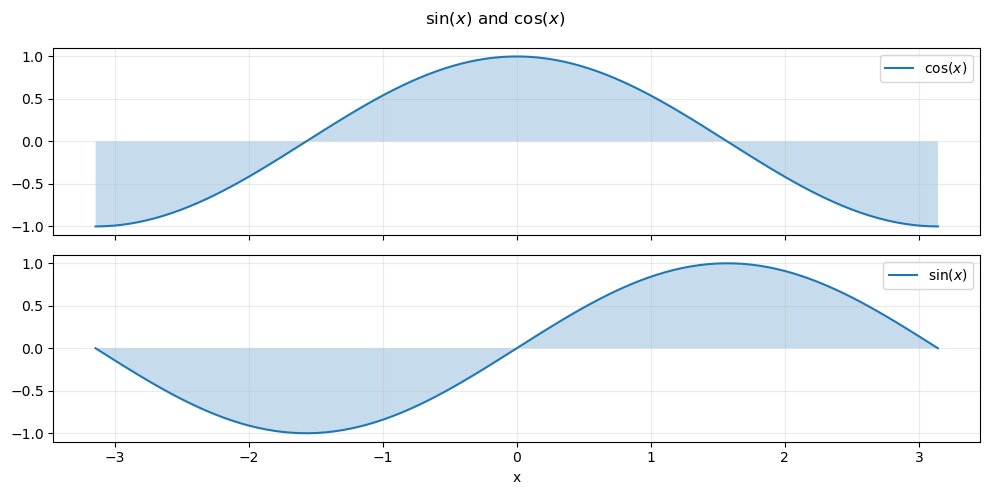

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 5), sharex = True)
# figure size of figsize = (a,b) is a inches on the x axis and b inches on the y axis
# of course the figure can still be scaled to different sizes, but it gives you that proportion
# sharex means to share the x axis between the rows

ax[1].set_xlabel(xlabel = "x")
# we use .set_xlabel() instead of .xlabel() when we're using the Object Oriented Interface
# we also set the x label on the second axis (on the bottom) because it looks nicer than having the label on ax[0]
ax[0].plot(x, cos_x, label = "cos($x$)")
ax[0].fill_between(x, 0, cos_x, alpha = .25)
ax[1].plot(x, sin_x, label = "sin($x$)")
ax[1].fill_between(x, 0, sin_x, alpha = .25)

for a in ax:
    a.legend()
    a.grid(alpha = .25)

fig.suptitle(r'sin($x$) and cos($x$)')
# this is a supertitle for the figure which is on top of all the axes
fig.tight_layout()
# squishes the graphs together a bit, uses space a little more efficiently

plt.show()

## 3 More rows and columns

### 3.1 Using ax

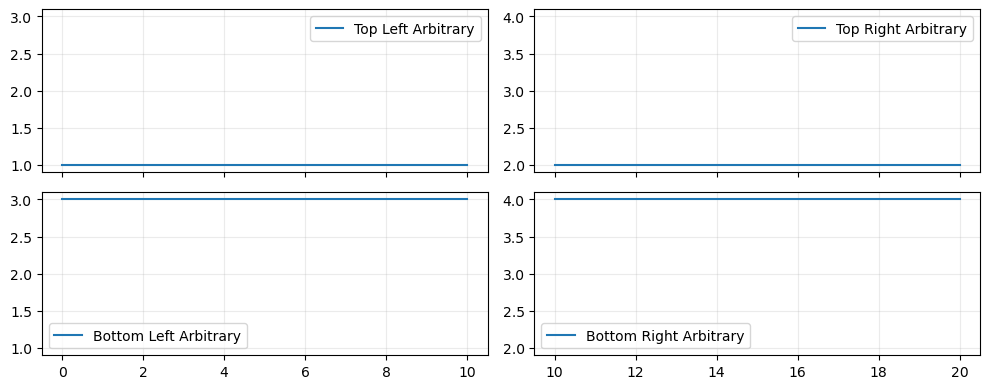

In [78]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,4),
                       sharex = 'col', sharey = 'col')
# 2 rows, 2 columns, figure size
# those in the same column share x axes
# everyone shares the same y axis

top_left, top_right, bottom_left, bottom_right = ax.flatten()
# ax is a 2 dimensional array, so flatten changes it into a 1d array
# we can only do this because we know the sequence that ax stores our graphs in

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1), label = "Top Left Arbitrary")
top_right.plot(x2, 2*np.ones_like(x2), label = "Top Right Arbitrary")
bottom_left.plot(x1, 3*np.ones_like(x1), label = "Bottom Left Arbitrary")
bottom_right.plot(x2, 4*np.ones_like(x2), label = "Bottom Right Arbitrary")

for a in ax.flatten():
    a.grid(alpha=.25)
    a.legend()
    
plt.tight_layout()
plt.show()



### 3.2 Sharing axes

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,4))

|Option|Result|
|:--:|:--|
|True|Makes **all** the axes use the same range of values|
|col| Uses the same range for all axes in the same column|
|row| Uses the same range for all axes in the same row|

Determine how to best represent your data and which axes should be shared when defining (or not defining) your sharex and sharey variables.

If you choose to not define them, the default assumption is False: all the axes will have their own range of values

### 3.3 Accessing all axes

In [81]:
for a in ax.flatten():
    a.grid(alpha = .25)

When you are working on a figure with many axes, it may be more effective to use a loop to iterate through them to carry out the operations that you want to carry out. Eg. axis.grid(alpha =.25) or axis.legend() will be the same for all axes within the figure, so you can use a for loop to run through these items and carry these methods out on all of your axes.

But also remember to flatten your 2d array of ax, doing ax.flatten()

## 4 Other useful plots

### 4.1 Histograms

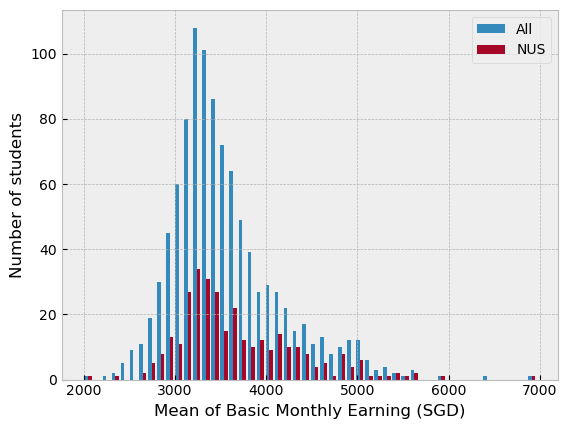

In [3]:
data = {}

filename = "sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv"
data["All"] = np.loadtxt(filename, skiprows = 1)
# this stores a key "All" in the data dictionary
# the value for this key is all the contents loaded from our file, skipping the first row

filename2 = "sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv"
data['NUS'] = np.loadtxt(filename2, skiprows = 1)

plt.style.use('bmh')

plt.hist([data["All"], data['NUS']], bins = 50, label = ["All", "NUS"])
plt.xlabel("Mean of Basic Monthly Earning (SGD)")
plt.ylabel("Number of students")
plt.legend()
plt.show()

plt.style.use("default")

### 4.2 Scatter plots

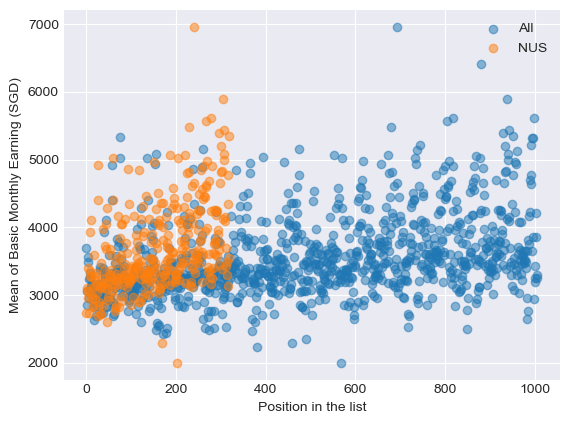

In [4]:
data = {}

for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.csv'
    data[label] = np.loadtxt(filename, skiprows=1)
#this is a faster way of setting up our data dictionary than the one we did in 4.1

plt.style.use('seaborn-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earning (SGD)')
plt.legend()

plt.show()

plt.style.use('default')

### 4.3 Bar charts

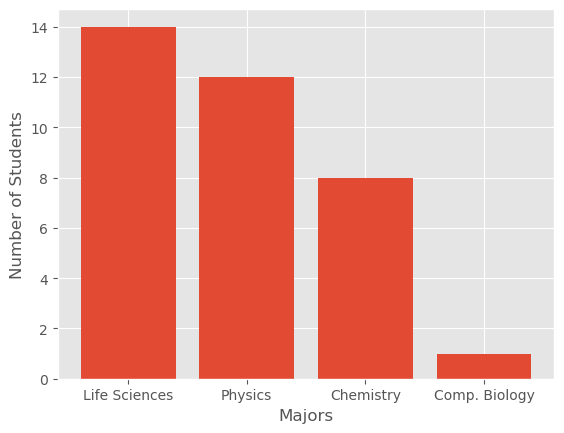

In [5]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')

plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()

plt.style.use('default')

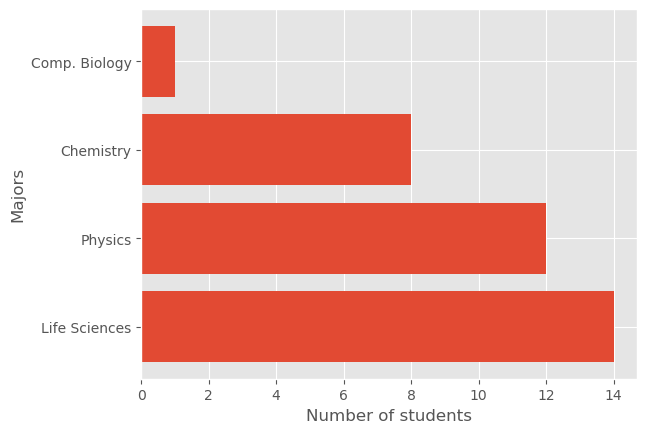

In [8]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')

plt.barh(majors, numbers)
plt.xlabel('Number of students')
plt.ylabel('Majors')

plt.show()

plt.style.use('default')

### 4.4 Pie charts

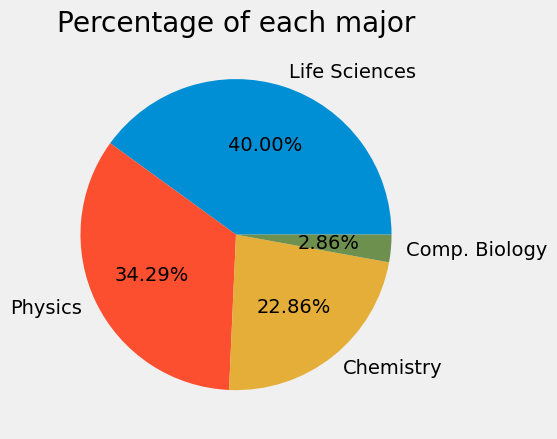

In [26]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')

plt.pie(numbers, labels=majors, autopct='%1.2f%%')
plt.title('Percentage of each major')

plt.show()

plt.style.use("default")

## Exercise 1 :  Plotting data from files

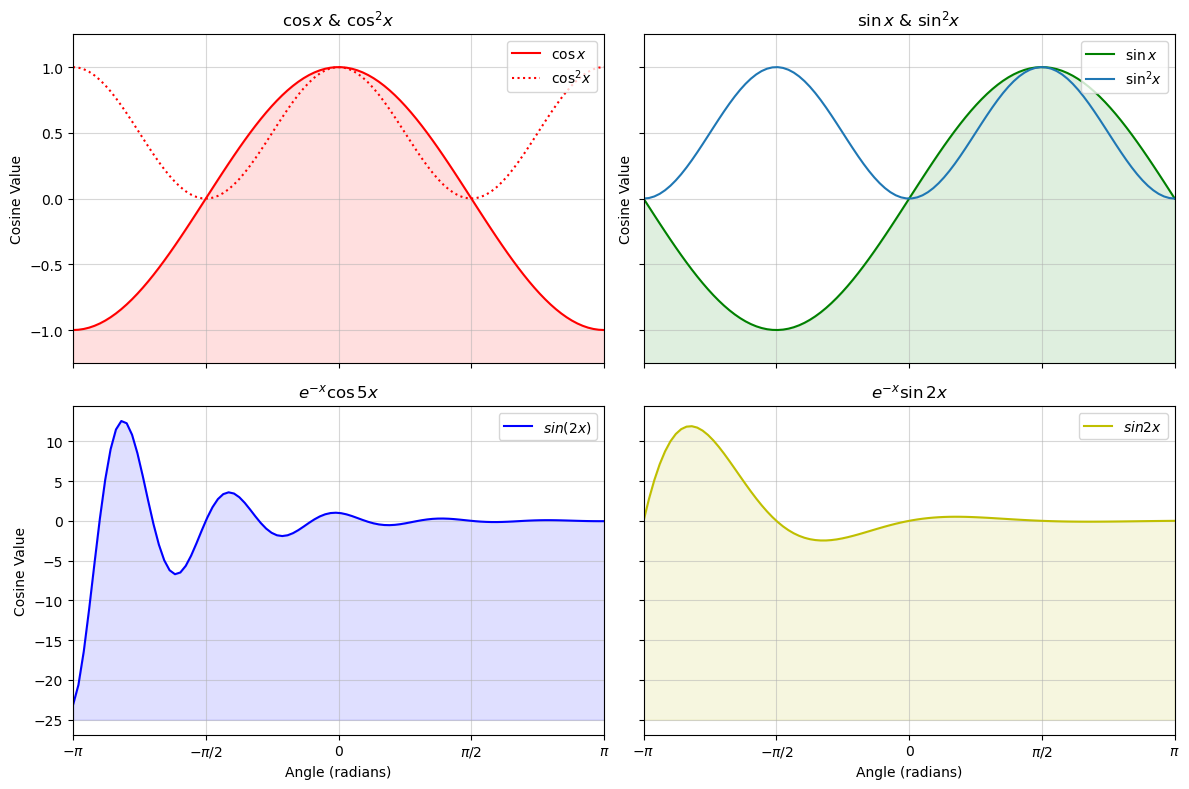

In [56]:
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8),  sharey='row', sharex = "col")

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$')
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].fill_between(x, cos_x, -2, color='r', alpha=.125)
axes[0, 0].legend(loc = "upper right")



#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label='$\sin x$')
axes[0, 1].set_title('$\sin x$ & $\sin^2x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].plot(x, sin_x**2, label='$\sin^2 x$')
axes[0, 1].set_ylabel('Cosine Value')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].set_xlim(-np.pi, np.pi)
axes[0, 1].legend(loc='upper right')


#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$sin(2x)$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xlim(-np.pi, np.pi)
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend()


#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label='$sin 2x$')
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 1].legend()
axes[1, 1].set_xlabel(xlabel = "Angle (radians)")


# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)

plt.tight_layout()
#reduces the amount of whitespace between axes
plt.show()